#  Chapter 5

Problems 5.1, 5.3, 5.4 5.7a, 5.8, 5.9, 5.11, 5.14, 5.19

## 5.1

The particle travels 8.22 meters in the x direction


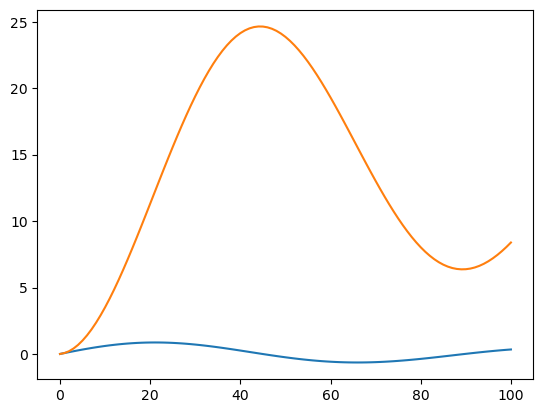

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# beginning with book's code for trap rule

velocities = np.loadtxt(r"C:\Users\hello\Downloads\CompPhys\velocities.txt")
x = velocities[:, 0]
y = velocities[:, 1]

N = 100 # number of slices
a = x # time
b = y # velocity
h = (b-a)/N # width

def take_sum(b): # this could just be put in s = 
    return sum(b[1:-1])


s = 0.5*b[0] + 0.5*b[-1] + take_sum(b)

# for k in range(1,N):    
#     s += trap(a+k*h)

print("The particle travels","%0.2f"%s, "meters in the x direction")

c = [b[0]]

for i in b[1:]:
    c.append(c[-1]+i)


plt.plot(x,y)
plt.plot(x,c)
plt.show()

## 5.3

Integral is 0.89


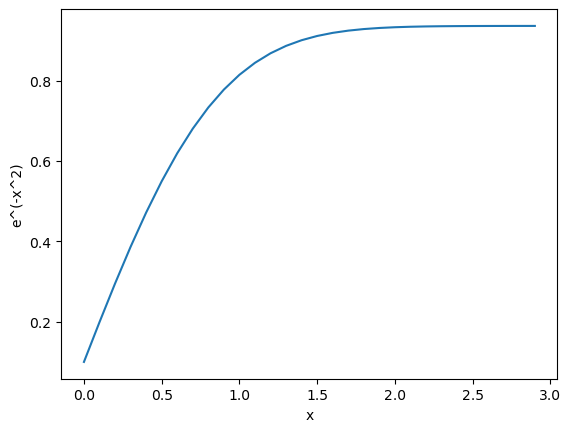

In [2]:
# using the same code for trap rule from book once again,
# but modifing to include arrays for x and Ex values so 
# that they can be plotted. integral is calculated using trap rule.

def f(x):
    return np.exp(-x**2)  # integral function

N = 30 # 30 slices because incrementing by .1 from 0 to 3 means 3/.1 = 30
a = 0.0
b = 3.0
h = (b-a)/N

s = 0.5*f(a) + 0.5*f(b)

for k in range(1,N):
    s += f(a+k*h)
    
sol = h*s
print("Integral is","%0.2f"%sol)


x = np.arange(a, b, 0.1)
Ex = [h*sum(f(a+i*h) for i in range(0,k+1)) for k in range(len(x))]

plt.xlabel('x')
plt.ylabel('e^(-x^2)')
plt.plot(x,Ex)


## 5.4

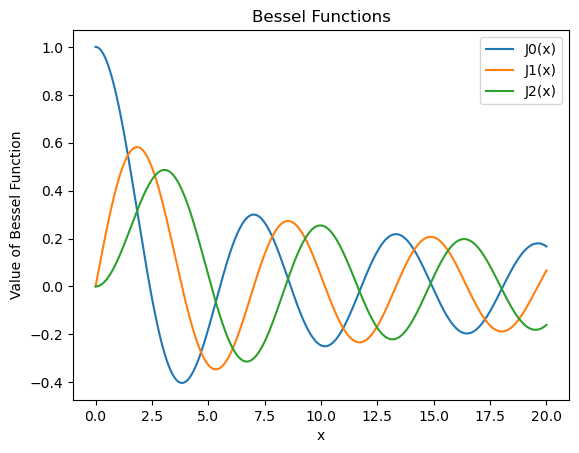

In [3]:
# The intensity of the light in this diffraction pattern is given by:
# I(r) = (J(kr) / kr)^2
# r is the distance in the focal plane from the center of the diffraction pattern
# k = 2pi/lambda
# J(x) is a Bessel function:
# J(x) = 1/pi * integral from 0 to pi (cos(m*theta - x*sin(theta))) dtheta
# here m is a nonnegative integer and x>=0

def J(m,x,N=1000): # Bessel Functions with Simpson's rule
    
    def integral(theta):
        return np.cos(m*theta - x*np.sin(theta))
    
    a = 0
    b = np.pi
    h = (b-a)/N
    odd_sum = 0
    even_sum = 0
    for k in range(1,N,2):
        odd_sum += integral(a+k*h)
    for k in range(2,N,2):
        even_sum += integral(a+k*h)

    return (1/np.pi) * (integral(a) + integral(b) + 4*odd_sum + 2*even_sum) * h/3


def J0(x):         # The three Bessel functions to be plotted
    return J(0,x)

def J1(x):
    return J(1,x)

def J2(x):
    return J(2,x)

x_values = np.linspace(0, 20, 1000) # values of x from 0 to 20

J0 = J0(x_values) # Calculate the values of J0, J1, and J2
J1 = J1(x_values)
J2 = J2(x_values)

plt.plot(x_values,J0, label='J0(x)')
plt.plot(x_values,J1, label='J1(x)')
plt.plot(x_values,J2, label='J2(x)')
plt.xlabel('x')
plt.ylabel('Value of Bessel Function')
plt.title('Bessel Functions')
plt.legend()
plt.show()



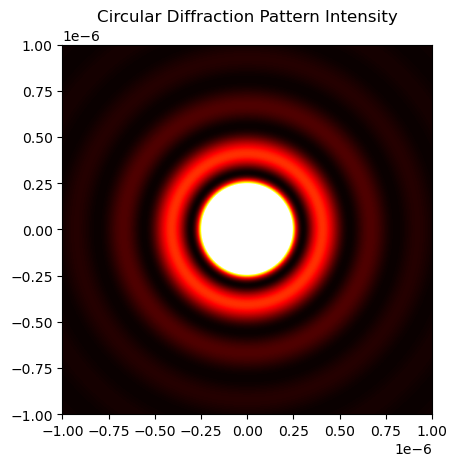

In [4]:
# part b but calling function from above, part a,

def intensity(r):
    lambda_ = 500e-9  # wavelength in meters, given
    k = 2*np.pi / lambda_
    return np.where(r == 0,1,(J(1,k*r) / (k*r))**2) # calling J() here # np.where: where True, yield x, otherwise yield y

# Define grid of x and y values
x_values = np.linspace(-1e-6, 1e-6, 500)  # -1 to 1 micrometer 
y_values = np.linspace(-1e-6, 1e-6, 500) 
X, Y = np.meshgrid(x_values, y_values)
R = np.sqrt(X**2 + Y**2)  # distance from center for each point
intensity_values = intensity(R)

plt.imshow(intensity_values, cmap='hot', extent=[-1e-6, 1e-6, -1e-6, 1e-6], vmax=0.01) # vmax = 0.01 as book suggests
plt.title('Circular Diffraction Pattern Intensity')
plt.show()

## 5.7a

In [5]:
# trying to begin with trapz rule from book and attempting to modify for adaptive trapz rule

def f(x):
    return np.sin(np.sqrt(100*x))**2 # here changing equation to the new eq we want to take integral of

def adaptive_trapz_rule(f, a, b, N, I_old=0):
    
    h = (b-a)/N
    x = np.linspace(a, b, N+1)
    s = 0.5*(f(a)+f(b))
    sol = h*s
    if N == 1: # starting with one slice
        return sol, 1
    
    weights = np.zeros(N+1) # looking at odd entries only
    weights[1::2] = 2
    odd_values = f(x[1::2]) # finding the odd values
    I = h*np.sum(odd_values*weights[1::2]) # integrating using odd values
    error = (I_old-I)/3 # finding error
    return I+error, error

N = 1
epsilon = 1e-6 # needed accuracy
a, b = 0, 1
integrals = []
errors = []
I_old, error = adaptive_trapz_rule(f, a, b, N)
integrals.append(I_old)

while abs(error) > epsilon:
    N *= 2
    I_old, error = adaptive_trapz_rule(f, a, b, N, I_old = I_old)
    print(f" slices = {N}, error = {abs(error)}")
    integrals.append(I_old)
    errors.append(error)

print()
print(f"Integral = {I_old}")
print(f"Accuracy of 1e-6 is reached at  N = {N} slices")

 slices = 2, error = 0.11816828217321507
 slices = 4, error = 0.10500591491570203
 slices = 8, error = 0.10020527749710702
 slices = 16, error = 0.02109732212699117
 slices = 32, error = 0.010204664765312807
 slices = 64, error = 0.0009632997094672358
 slices = 128, error = 0.0005546064678620585
 slices = 256, error = 0.00042155182147015263
 slices = 512, error = 0.00020081583502099912
 slices = 1024, error = 8.208402397730241e-05
 slices = 2048, error = 3.11521220938323e-05
 slices = 4096, error = 1.1332012690138763e-05
 slices = 8192, error = 4.014347862550209e-06
 slices = 16384, error = 1.3973696103194062e-06
 slices = 32768, error = 4.806033517268382e-07

Integral = 0.4558330277259364
Accuracy of 1e-6 is reached at  N = 32768 slices


## 5.8

In [6]:
# only using adaptive Simpson’s rule to compare with 5.7.a.

# keeping same code from part 5.7.a. and modifying for Simpson's rule

def f(x):
    return np.sin(np.sqrt(100*x))**2  # here changing equation to the new eq we want to take integral of

def adaptive_simpson_rule(f, a, b, N, I_old=0):
    
    h = (b-a)/N
    x = np.linspace(a, b, N+1)
    y = f(x)
    fa, fb = y[0], y[-1]

    weights = np.ones(N + 1)
    weights[0], weights[-1] = 0, 0
    weights_S, weights_T = weights.copy(), weights.copy()
    weights_S[1::2] = 0  # this sums over the even terms only
    weights_T[::2] = 0  # this sums over the odd terms only
    S = (1/3)*(fa+fb+2*np.sum(weights_S*y))
    T = (2/3)*np.sum(weights_T*y)
    I_new = h*(S+2*T)
    error = (1/15)*(I_new-I_old)
    return I_new, error

N = 1                                       # all this is same
epsilon = 1e-6 # needed accuracy            #
a, b = 0, 1                                 #
integrals = []                              #
errors = []                                 #
I_old, error = adaptive_simpson_rule(f, a, b, N) # here function name changes
integrals.append(I_old)                     #
                                            #
while abs(error) > epsilon:                 #
    N *= 2                                  #
    I_old, error = adaptive_simpson_rule(f, a, b, N, I_old=I_old) # here function name changes
    print(f"slices = {N}, error = {error}") #
    integrals.append(I_old)                 #
    errors.append(error)                    #
                                            #
print()
print(f"Integral = {I_old}")
print(f"Accuracy of 1e-6 is reached at N = {N} slices")
print(f"Comparing, Simpson's rule reaches the accuracy much faster at 256 slices than 32768 slices for trapazoid rule")

slices = 2, error = 0.019044203946354275
slices = 4, error = 0.012687807742391213
slices = 8, error = -0.013870945597715319
slices = 16, error = 0.004837979678023951
slices = 32, error = 0.0010253170034309625
slices = 64, error = 8.181700486445582e-05
slices = 128, error = 5.422826706654356e-06
slices = 256, error = 3.4389254065144335e-07

Integral = 0.4558321871467207
Accuracy of 1e-6 is reached at N = 256 slices
Comparing, Simpson's rule reaches the accuracy much faster at 256 slices than 32768 slices for trapazoid rule


## 5.9

In [7]:
################ this is from the book's reference code from the author's website ################################
###### tried to import to same directory as book suggests but did not work, so just put it here instead ######
###### made sure to import as .py file and not .txt ######

# def gaussxw(N):

#     # Initial approximation to roots of the Legendre polynomial
#     a = np.linspace(3,4*N-1,N)/(4*N+2)
#     x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

#     # Find roots using Newton's method
#     epsilon = 1e-15
#     delta = 1.0
#     while delta>epsilon:
#         p0 = np.ones(N,float)
#         p1 = np.copy(x)
#         for k in range(1,N):
#             p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
#         dp = (N+1)*(p0-x*p1)/(1-x*x)
#         dx = p1/dp
#         x -= dx
#         delta = max(abs(dx))

#     # Calculate the weights
#     w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

#     return x,w

# def gaussxwab(N,a,b):
#     x,w = gaussxw(N)
#     return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

######################################################################################################################

# fixed issue #
from gaussxw import gaussxwab # calling upon the gaussian quadrature integration code from book

def f(x):
    return (x**4*np.exp(x)) / (np.exp(x)-1)**2

N = 50  # N = 50 given
a = 0.0
theta_D = 428  # 428 Kelvin, given Debye temperature
T = float(input("Enter the temperature (Kelvin): "))  # for what temperature

x,w = gaussxwab(N,0,theta_D/T)

s = np.sum(w*f(x)) # summing

V = 1000  # volume
rho = 6.022e28  # density
k_B = 1.3806452e-23  # boltzmann constant in J/K
Cv = 9*V*rho*k_B*(T/theta_D)**3 *s

print("Heat Capacity at T =", T, "K:", Cv)

Enter the temperature (Kelvin): 100
Heat Capacity at T = 100.0 K: 1153260586.9850132


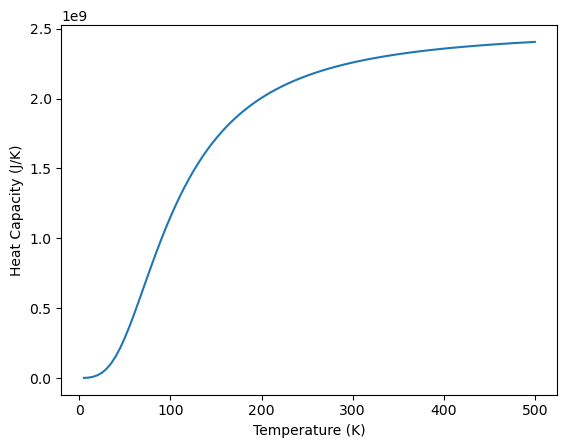

In [8]:
temperatures = np.linspace(5, 500, 100) # temp range from 5 to 500
heat_capacities = [] # creating empty list

for T in temperatures:
    x, w = gaussxwab(N,0,theta_D/T)

    s = np.sum(w*f(x)) # summing

    Cv = 9*V*rho*k_B*(T/theta_D)**3 *s # heat capacity
    heat_capacities.append(Cv)

# Plotting
plt.figure()
plt.plot(temperatures, heat_capacities)
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity (J/K)')
plt.show()

## 5.11

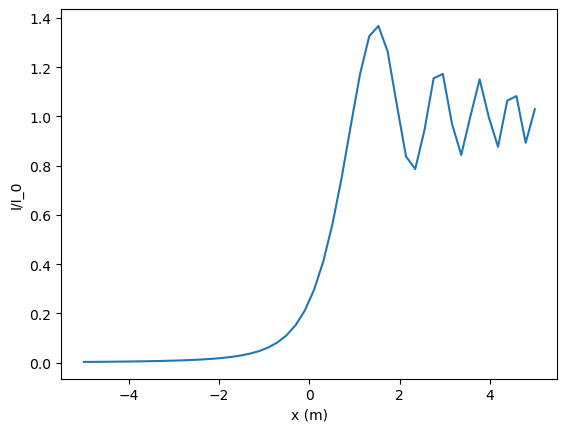

In [9]:
from gaussxw import gaussxwab # calling upon the gaussian quadrature integration code from book

N = 50  # given points as N = 50
z = 3  # z = 3 meters
l = 1  # lambda = 1 meter

ratio_list = [] # empty list for I/I_0 values
range_of_x = np.linspace(-5, 5, N)  # range of -5 to 5

for x in range_of_x: # loop over x
    
    u_val = x * np.sqrt(2 / (l * z)) # calculating u given as x*root(2/lambda * z)
    x_cos, w_cos = gaussxwab(N, 0, u_val) # gaussian quadrature for cos function
    integral_c = np.sum(w_cos*np.cos(np.pi/2*x_cos**2))

    x_sin, w_sin = gaussxwab(N, 0, u_val) # gaussian quadrature for sin function
    integral_s = np.sum(w_sin*np.sin(np.pi/2*x_sin**2))
    
    ratio_of_I = ((2*integral_c+1)**2 + (2*integral_s+1)**2)/8   # the I/I_0 ratio
    ratio_list.append(ratio_of_I)

plt.xlabel("x (m)")
plt.ylabel("I/I_0")
plt.plot(range_of_x, ratio_list)
plt.show()

## 5.14

In [10]:
# part a

# Force of gravity is given by F = G * m1*m2 / r^2
# let m1 be point mass where m1 = 1kg so that formula becomes:
# F = G * 1*m2 / r^2

# m2 can be mass of the plate, as the mass of sheet is uniform
# this can be written as m2 = double_integral(density)dxdy from -L/2 to L/2    # here, density is mass per unit area 

# the distance between the mass points can be written as r = root(x^2 + y^2 + z^2)

# subbing all into equation of F
# F = G*density* double_integral(dxdy / (x^2 + y^2 + z^2) ) from -L/2 to L/2

# then this equation needs to be multiplied by cos(phi) = z / x^2 + y^2 + z^2

# this gives equation need for part a:
# F_z = G*density*z *double_integral(dxdy / (x^2 + y^2 + z^2)^(3/2) ) from -L/2 to L/2


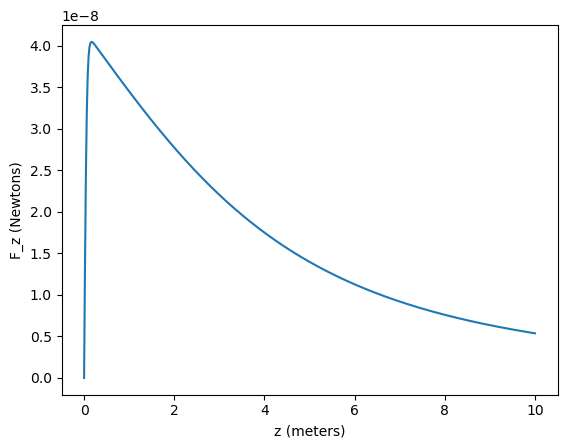

In [11]:
# part b

from gaussxw import gaussxwab # calling upon the gaussian quadrature integration code from book

def f(x, y, z): # x,y,z are ther terms in F equation
    return G*sigma*z/(x**2+y**2+z**2)**(3/2) # equation we have form part a

def double_Gaussian_quadrature(f,start,stop,N,z):
    x_vals, weights = gaussxwab(N, start, stop)
    I = sum(weights[i]*weights[j]*f(x_vals[i],x_vals[j], z) 
            for i in range(N) for j in range(N))
    return I


G = 6.674e-11 # graviational constant
L = 10 # sheet metal length in meters


m = 10000  # 100 sample mass points along each axis so 100*100 = 10000 kg which gives us our sheet mass
           # as each point mass was given by problem statement to be 1kg
sigma = m/L**2 # density / mass per unit area (in this case)
integrate_from = -L/2 # starting integration from -L/2 
integrate_to = L/2    # to L/2 as we have from the equation of F

z_values = np.linspace(0, 10, 500) # makes array of 500 evenly spaced values from 0 to 10
F_z = double_Gaussian_quadrature(f, integrate_from, integrate_to, 100, z_values) # N = 100

plt.xlabel("z (meters)")
plt.ylabel("F_z (Newtons)")
plt.plot(z_values, F_z)
plt.show()

In [12]:
# part c

# This error is due to distance between area dM of sheet and point mass when z approaches 0. This gives extremely 
# large values for F.

# This problem may be solved by giving the mass some radius instead of it being a point mass.

## 5.19

In [13]:
# part a

# The function will have periodicity of T = pi/alpha as its a squared sine wave.
# At the grate, the function will have maximum intensity so grating space d = pi/alpha.


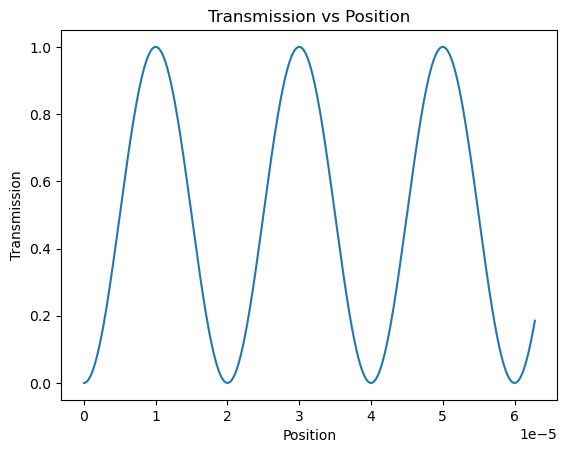

In [14]:
# part b

def q(u): # u is position
    d = 20e-6 # given value
    alpha = np.pi/d  # this is from d = pi/alpha, rearranging we have, alpha = pi/d
    sol = np.sin(alpha*u)**2  # this is the q(u) formula, where q(u) = sin^2(alpha*u)
    return sol

position = np.linspace(0, np.pi*20e-6, 1000) 
transmission = q(position)

plt.figure()
plt.plot(position, transmission)
plt.xlabel('Position')
plt.ylabel('Transmission')
plt.title('Transmission vs Position')
plt.show()

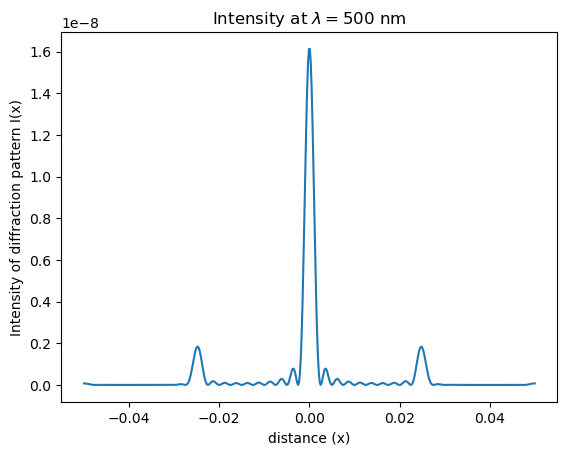

In [15]:
# part c
# using simpson's rule

def simpsons_rule(f, x, a, b, N):
    
    h = (b-a)/N
    even = 0
    odd = 0
    for k in range(1, N):
        if k % 2 == 0:
            even += f(a+k*h, x)
        else:
            odd += f(a+k*h, x)
    I = f(a,x) + f(b,x) + 4*odd + 2*even
    sol = h*I/3
    return sol

def f(u, x): # the integral itself
    first_term = np.sqrt(q(u)) # square root of q(u)
    second_term = np.exp(1j*2*np.pi*x*u/(lamb*focal_length)) # e^(i*2pi*x*u / lambda*f)    f = focal_length, lambda = lamb
                         # 1j is the imaginary unit
    sol = first_term*second_term
    return sol

# constants
slits = 10    # given number of slits
lamb = 500e-9 # given wavelength of 500 nm
focal_length = 1    # given focal length of 1 meter

d = 20e-6 # slit seperation
width_grating = slits*d # grating width
alpha = np.pi/d
width_of_screen = 0.10 # 10 cm wide screen

a = -width_grating*0.5 # inputs for the integration function
b = width_grating*0.5
distance = np.linspace(-0.05, 0.05, 500)

Intensity_diffraction = np.abs(simpsons_rule(f, distance, a, b, 1000))**2 # N = 1000

plt.figure()
plt.plot(distance, Intensity_diffraction)
plt.title("Intensity at $\lambda=500$ nm")
plt.xlabel("distance (x)")
plt.ylabel("Intensity of diffraction pattern I(x)")
plt.show()

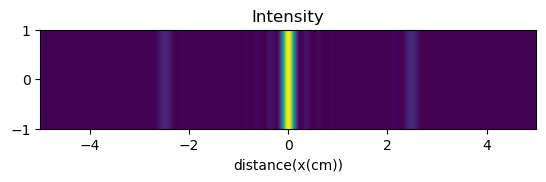

In [16]:
# part d

matrix = np.zeros((len(Intensity_diffraction), len(Intensity_diffraction))) # initialize array of 0s with len(dimensions)
for i, values in enumerate(Intensity_diffraction):                          # makes square matrix because dim x dim
    matrix[:,i] = values # values is i column of matrix from Intensity_diffraction

plt.figure()
plt.imshow(matrix, extent=[-5,5,-1,1])
plt.title("Intensity")
plt.xlabel("distance(x(cm))")
plt.show()

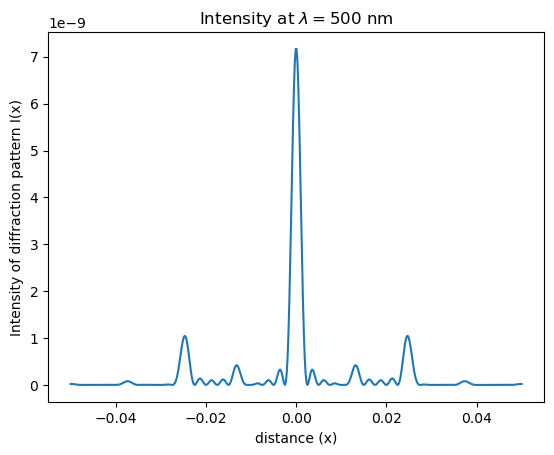

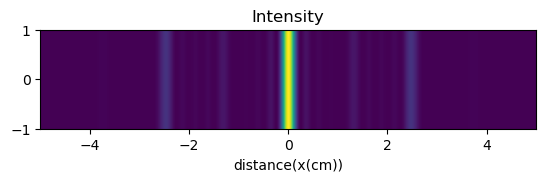

In [17]:
# part e, part i

# from part b

def q(u): # u is position
    d = 20e-6 # given value
    alpha = np.pi/d  # this is from d = pi/alpha, rearranging we have, alpha = pi/d
    beta = 0.5*alpha # condition given by problem beta = 1/2 alpha
    sol1 = np.sin(alpha*u)**2  # this is the q(u) formula, where q(u) = sin^2(alpha*u)
    sol2 = np.sin(beta*u)**2  # same line changed alpha to beta
    sol = sol1 * sol2
    return sol   # this satisfies equation q(u) = sin^2(alpha*u) * sin^2(beta*u) where beta = 1/2 alpha

# from part c 
# this does not change, integral is the same
def f(u, x): # the integral itself
    first_term = np.sqrt(q(u)) # square root of q(u)
    second_term = np.exp(1j*2*np.pi*x*u/(lamb*focal_length)) # e^(i*2pi*x*u / lambda*f)    f = focal_length, lambda = lamb
                         # 1j is the imaginary unit
    sol = first_term*second_term
    return sol
# constants also dont change
slits = 10    # given number of slits
lamb = 500e-9 # given wavelength of 500 nm
focal_length = 1    # given focal length of 1 meter

d = 20e-6 # slit seperation
width_grating = slits*d # grating width
alpha = np.pi/d
width_of_screen = 0.10 # 10 cm wide screen

a = -width_grating*0.5 # inputs for the integration function
b = width_grating*0.5
distance = np.linspace(-0.05, 0.05, 500)
# function and plot are the same, all that changed was the original integral where beta had to be included
Intensity_diffraction = np.abs(simpsons_rule(f, distance, a, b, 1000))**2 # N = 1000

plt.figure()
plt.plot(distance, Intensity_diffraction)
plt.title("Intensity at $\lambda=500$ nm")
plt.xlabel("distance (x)")
plt.ylabel("Intensity of diffraction pattern I(x)")
plt.show()

# density plot, same as before
matrix = np.zeros((len(Intensity_diffraction), len(Intensity_diffraction))) # initialize array of 0s with len(dimensions)
for i, values in enumerate(Intensity_diffraction):                          # makes square matrix because dim x dim
    matrix[:,i] = values # values is i column of matrix from Intensity_diffraction

plt.figure()
plt.imshow(matrix, extent=[-5,5,-1,1])
plt.title("Intensity")
plt.xlabel("distance(x(cm))")
plt.show()

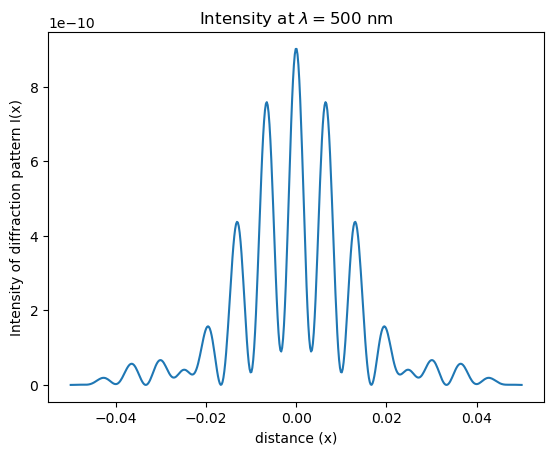

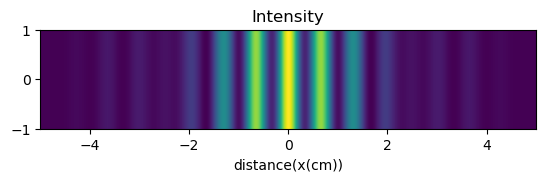

In [18]:
# part e, part ii

# constants dont change
slits = 10    # given number of slits
lamb = 500e-9 # given wavelength of 500 nm
focal_length = 1    # given focal length of 1 meter
d = 20e-6 # slit seperation
alpha = np.pi/d
width_of_screen = 0.10 # 10 cm wide screen
# adding constants
slit_a = 10e-6
slit_b = 20e-6
slit_seperation = 60e-6
width_grating = slit_a + slit_b + slit_seperation    # grating width

a = -width_grating*0.5 # inputs for the integration function
b = width_grating*0.5


# from part c, changing
def f(u, x): 
    if (u <= a + slit_a) or (u >= b - slit_b):
        return np.exp(1j*2*np.pi*x*u/(lamb*focal_length))
    else: return 0

distance = np.linspace(-0.05, 0.05, 500)
Intensity_diffraction = np.abs(simpsons_rule(f, distance, a, b, 1000))**2 # N = 1000

plt.figure()
plt.plot(distance, Intensity_diffraction)
plt.title("Intensity at $\lambda=500$ nm")
plt.xlabel("distance (x)")
plt.ylabel("Intensity of diffraction pattern I(x)")
plt.show()

# density plot, same as before
matrix = np.zeros((len(Intensity_diffraction), len(Intensity_diffraction))) # initialize array of 0s with len(dimensions)
for i, values in enumerate(Intensity_diffraction):                          # makes square matrix because dim x dim
    matrix[:,i] = values # values is i column of matrix from Intensity_diffraction

plt.figure()
plt.imshow(matrix, extent=[-5,5,-1,1])
plt.title("Intensity")
plt.xlabel("distance(x(cm))")
plt.show()